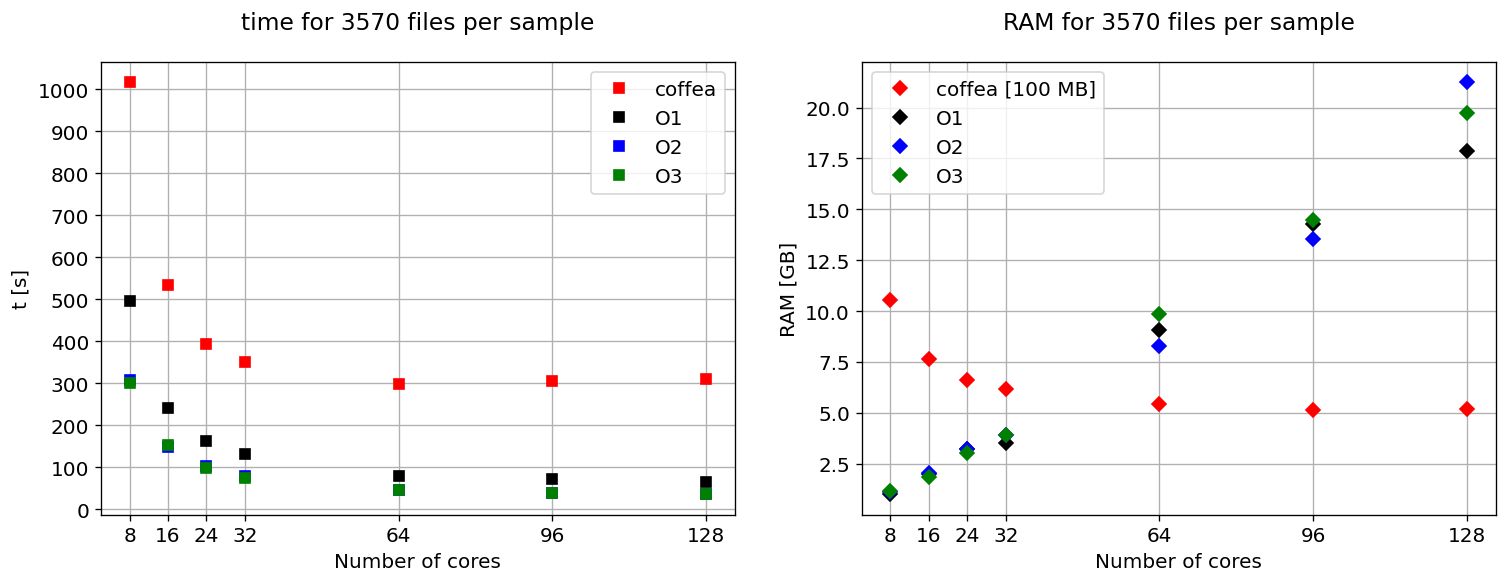

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker




plt.rcParams["font.size"] = 12
plt.rcParams["figure.dpi"] = 120

def get_fig_for(nfiles=3750):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    n = list(range(32,129,32))+list(range(8, 32, 8))

    labels = ['coffea', 'O1', 'O2', 'O3']
    colors = ['r', 'k', 'b', 'g']
    colors = {labels[i]:colors[i] for i in range(len(labels))}

    for label in labels:
        t = []
        mem = []
        for ncores in n:
            file = f'benchmarks/{nfiles}/{label}/{ncores}/1'
            with open(file, 'r') as f:
                for line in f.readlines():
                    if (label == 'coffea'):
                        if 'execution took' in line:
                            time = float(line.split()[2])
                            t.append(time)
                    else:
                        if 'RunGraphs' in line and 'elapsed' in line:
                            time = float(line.split()[-2][0:-1])
                            t.append(time)
                    if 'maxresident' in line:
                        ram = int(line.split()[-1].split('maxresident')[0])#/100000
                        mem.append(ram)
        ax[0].plot(n, t, f'{colors[label]}s', label = label)
        mem = np.array(mem)/1e5 if label=='coffea' else np.array(mem)/1e6
        if label == 'coffea': ax[1].plot(n, mem, f'{colors[label]}D', label = label+' [100 MB]')
        else: ax[1].plot(n, mem, f'{colors[label]}D', label = label)



    ax[0].set_xlabel('Number of cores')
    ax[0].set_ylabel('t [s]')
    ax[0].grid()
    ax[0].set_xticks(n)
    ax[0].set_yticks(list(range(0, 1100, 100)))
    #ax[0].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    ax[0].legend()
    ax[0].set_title('time for 3570 files per sample', fontsize=14, x=0.5, y=1.05)
    # ax[0].set_ylim([0,360])

    ax[1].set_xlabel('Number of cores')
    ax[1].set_ylabel('RAM [GB]')
    ax[1].grid()
    ax[1].set_xticks(n)
    ax[1].legend()
    ax[1].set_title('RAM for 3570 files per sample', fontsize=14, x=0.5, y=1.05)
    # ax[1].set_ylim([0,352])
    return fig



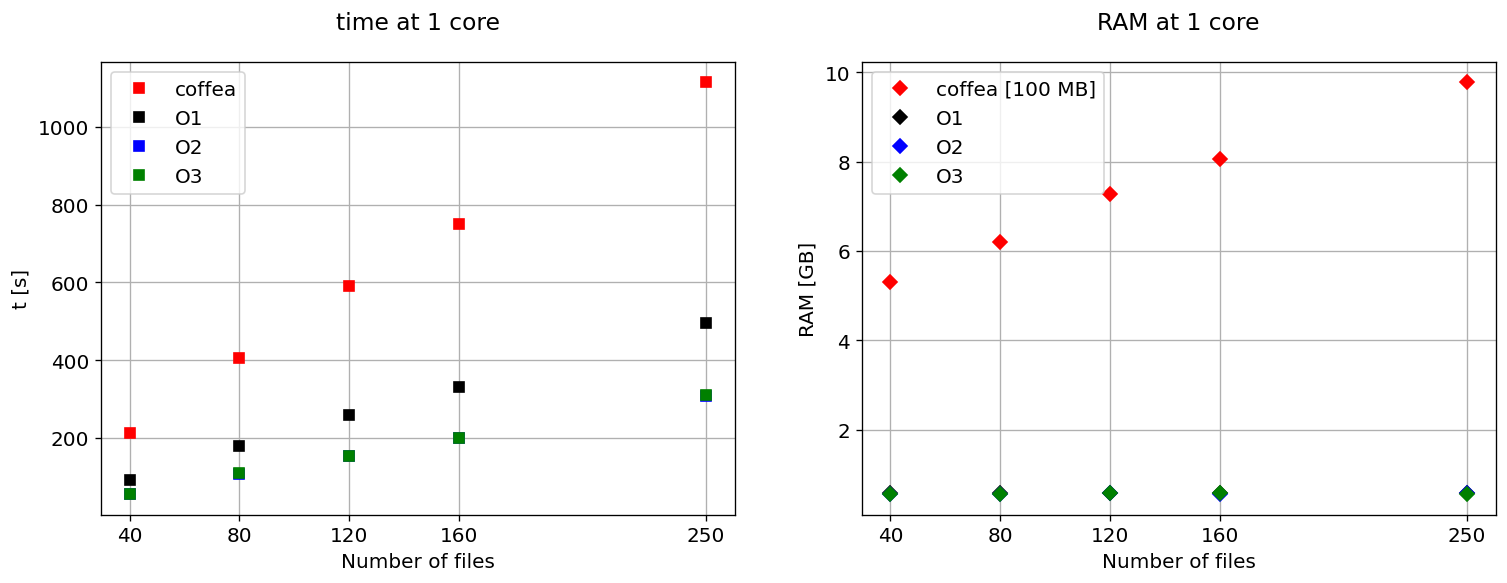

In [55]:
n = list(range(40, 161, 40)) + [250]
fig, ax = plt.subplots(1,2, figsize=(15,5))
for label in labels:
    t = []
    mem = []
    for nfiles in n:
        file = f'benchmarks/{nfiles}/{label}/1/1'
        with open(file, 'r') as f:
            for line in f.readlines():
                if (label == 'coffea'):
                    if 'execution took' in line:
                        time = float(line.split()[2])
                        t.append(time)
                else:
                    if 'RunGraphs' in line and 'elapsed' in line:
                        time = float(line.split()[-2][0:-1])
                        t.append(time)
                if 'maxresident' in line:
                    ram = int(line.split()[-1].split('maxresident')[0])#/100000
                    mem.append(ram)
    ax[0].plot(n, t, f'{colors[label]}s', label = label)
    mem = np.array(mem)/1e5 if label=='coffea' else np.array(mem)/1e6
    if label == 'coffea': ax[1].plot(n, mem, f'{colors[label]}D', label = label+' [100 MB]')
    else: ax[1].plot(n, mem, f'{colors[label]}D', label = label)
    
    

ax[0].set_xlabel('Number of files')
ax[0].set_ylabel('t [s]')
ax[0].grid()
ax[0].set_xticks(n)
# ax[0].set_yticks(list(range(0, 1100, 100)))
#ax[0].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax[0].legend()
ax[0].set_title('time at 1 core', fontsize=14, x=0.5, y=1.05)
# ax[0].set_ylim([0,360])

ax[1].set_xlabel('Number of files')
ax[1].set_ylabel('RAM [GB]')
ax[1].grid()
ax[1].set_xticks(n)
ax[1].legend()
ax[1].set_title('RAM at 1 core', fontsize=14, x=0.5, y=1.05)
fig.savefig('1core1part.png')

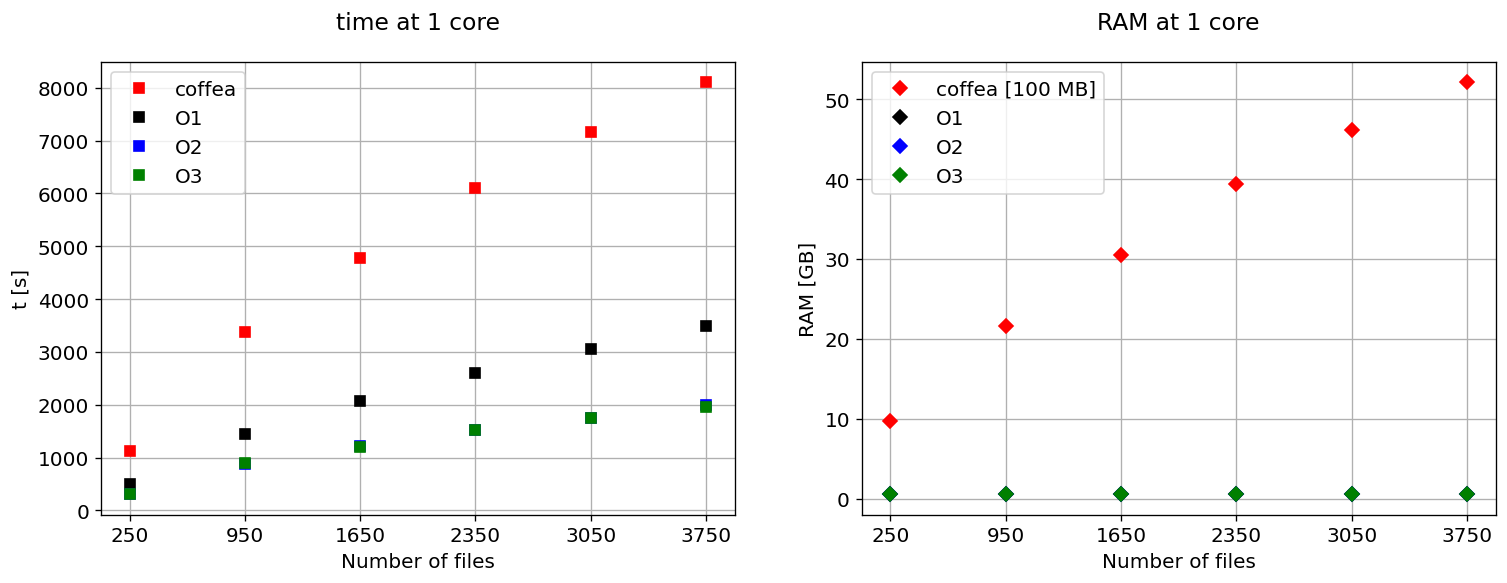

In [58]:
n = list(range(250, 3751, 700))
fig, ax = plt.subplots(1,2, figsize=(15,5))
for label in labels:
    t = []
    mem = []
    for nfiles in n:
        file = f'benchmarks/{nfiles}/{label}/1/1'
        with open(file, 'r') as f:
            for line in f.readlines():
                if (label == 'coffea'):
                    if 'execution took' in line:
                        time = float(line.split()[2])
                        t.append(time)
                else:
                    if 'RunGraphs' in line and 'elapsed' in line:
                        time = float(line.split()[-2][0:-1])
                        t.append(time)
                if 'maxresident' in line:
                    ram = int(line.split()[-1].split('maxresident')[0])#/100000
                    mem.append(ram)
    ax[0].plot(n, t, f'{colors[label]}s', label = label)
    mem = np.array(mem)/1e5 if label=='coffea' else np.array(mem)/1e6
    if label == 'coffea': ax[1].plot(n, mem, f'{colors[label]}D', label = label+' [100 MB]')
    else: ax[1].plot(n, mem, f'{colors[label]}D', label = label)
    
    

ax[0].set_xlabel('Number of files')
ax[0].set_ylabel('t [s]')
ax[0].grid()
ax[0].set_xticks(n)
# ax[0].set_yticks(list(range(0, 1100, 100)))
#ax[0].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax[0].legend()
ax[0].set_title('time at 1 core', fontsize=14, x=0.5, y=1.05)
# ax[0].set_ylim([0,360])

ax[1].set_xlabel('Number of files')
ax[1].set_ylabel('RAM [GB]')
ax[1].grid()
ax[1].set_xticks(n)
ax[1].legend()
ax[1].set_title('RAM at 1 core', fontsize=14, x=0.5, y=1.05)
fig.savefig('1core2part.png')